# Calculate the Averaged Temperature Anomaly 

## Averaged Temperature Anomaly 2081-2100 vs 1971-2000 SSP585

This example calculates the averaged temperature anomaly (using the **TG** indicator) for the period 2081-2100 compared to the reference 1971-2000 for SSP585 and several climate models.

We assume to have the **tas** variable in netCDF files in a `./data` folder.
The data can be dowloaded using the [metalink](data/cmcc_gfdl_tas.metalink) provided with this notebook.
The data described in a `.metalink` file can be dowloaded with tools such as [aria2](https://aria2.github.io/) or a browser plugin such as [DownThemAll!](https://addons.mozilla.org/en-US/firefox/addon/downthemall/)
If you wish to use a different dataset, you can use the [climate 4 impact portal](https://www.climate4impact.eu/c4i-frontend/) to search and select the data you wish to use and a metalink file to the [ESGF](https://esgf.llnl.gov/) data will be provided.


The data is read using xarray and a plot of the time series averaged over Europe is generated, as well as an average spatial map. Several output types examples are shown.

The datasets that are expected for this notebook are tas parameter (needed to calculate the TG indicator) for several climate models, for the historical (1971-2000) and ssp585 (2081-2100) experiments and for one member. Daily data is used. In [C4I](https://www.climate4impact.eu/c4i-frontend/search), you can find all of the data needed in the CMIP6 project, at the **esgf-data3.ceda.ac.uk** and **esgf3.dkrz.de** mirrors.

## Preparation of the needed modules

In [2]:
%pip install icclim matplotlib nc_time_axis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import sys
from pathlib import Path

import icclim

# provides cftime axis in matplotlib
import numpy as np
import pandas as pd
import xarray as xr

print("python: ", sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)

python:  3.11.7 | packaged by conda-forge | (main, Dec 15 2023, 08:38:37) [GCC 12.3.0]
numpy:  1.26.2
xarray:  2023.10.1
pandas:  2.1.4
icclim:  6.6.0


### Datasets

The metafile associated with this notebook describes how to download the dataset we use here.\
We reccomend to use [aria2](https://github.com/aria2/aria2) to parse the metafile and download the dataset it describes.\
On ubuntu, aria2 can be installed with `sudo apt install -y aria2`.

## Specification of the parameters and period of interest

The time period of interest as well as the reference period are defined here.
A list of models is listed here as an example.
Here we used Monthly data (Amon) but daily data could also be used.
The corresponding datafiles must have been selected by the user, containing both the studied and referenced periods.

icclim is then executed for both periods for each climate model separately.

In [8]:
# studied period
dt1 = datetime.datetime(2081, 1, 1, tzinfo=datetime.timezone.utc)
dt2 = datetime.datetime(2100, 12, 31, tzinfo=datetime.timezone.utc)

# reference period
dtr1 = datetime.datetime(1971, 1, 1, tzinfo=datetime.timezone.utc)
dtr2 = datetime.datetime(2000, 12, 31, tzinfo=datetime.timezone.utc)

models = ["CMCC-ESM2", "GFDL-ESM4"]
out_f = {}
out_hist_f = {}
for model in models:
    print(f"Processing model: {model}")
    out_f[model] = f"data/tg_icclim_{model}.nc"
    out_hist_f[model] = f"data/tg_icclim_{model}_hist.nc"
    filenames_hist = Path("data").glob(f"tas_day_{model}_historical_*.nc")
    filenames = Path("data").glob(f"tas_day_{model}_ssp585_*.nc")
    icclim.index(
        index_name="TG",
        in_files=[str(f) for f in filenames],
        var_name="tas",
        slice_mode="year",
        time_range=[dt1, dt2],
        out_file=out_f[model],
        logs_verbosity="LOW",
    )
    icclim.index(
        index_name="TG",
        in_files=[str(f) for f in filenames_hist],
        var_name="tas",
        slice_mode="year",
        time_range=[dtr1, dtr2],
        out_file=out_hist_f[model],
        logs_verbosity="LOW",
    )

2024-01-19 09:56:34,358 --- icclim 6.6.0
2024-01-19 09:56:34,359 --- BEGIN EXECUTION
2024-01-19 09:56:34,360 Processing: 0%


Processing model: CMCC-ESM2


/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
2024-01-19 09:56:50,956 Processing: 100%
2024-01-19 09:56:50,957 --- icclim 6.6.0
2024-01-19 09:56:50,958 --- CPU SECS = 28.970    
2024-01-19 09:56:50,958 --- END EXECUTION
2024-01-19 09:56:50,971 --- icclim 6.6.0
2024-01-19 09:56:50,972 --- BEGIN EXECUTION
2024-01-19 09:56:50,973 Processing: 0%
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable do

Processing model: GFDL-ESM4


/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
2024-01-19 09:57:29,710 Processing: 100%
2024-01-19 09:57:29,711 --- icclim 6.6.0
2024-01-19 09:57:29,712 --- CPU SECS = 82.298    
2024-01-19 09:57:29,713 --- END EXECUTION
2024-01-19 09:57:29,726 --- icclim 6.6.0
2024-01-19 09:57:29,727 --- BEGIN EXECUTION
2024-01-19 09:57:29,727 Processing: 0%
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable do

### Data preparation

Here all data is loaded in 2 separate variables, one containing all the historical periods for all the models, and the same for the future time period.

An example is shown on how to select a specific data location. But this is not used.

In [9]:
# Open datasets
tg = []
tg_hist = []
ds = []
ds_hist = []
xr.set_options(enable_cftimeindex=False)
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    dsl["time"] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({"model_id": model})
    tg.append(dsl["TG"])

    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl["time"] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({"model_id": model})
    tg_hist.append(dshl["TG"])

# Select a single x,y combination from the data
longitude = tg[0]["lon"].sel(lon=3.5, method="nearest").values
latitude = tg[0]["lat"].sel(lat=44.2, method="nearest").values

print("Long, Lat values:", longitude, latitude)

Long, Lat values: 3.75 43.8219895287958


/home/bzah/micromamba/envs/icclim-dev/lib/python3.11/site-packages/xarray/core/options.py:117: FutureWarning: The enable_cftimeindex option is now a no-op and will be removed in a future version of xarray.
  warnings.warn(


## Perform spacial average on all the geographical domain

In [10]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].sel(lat=[0.0, 90.0], method="nearest").mean(dim=["lon", "lat"])
for ii in range(len(tg_hist)):
    tg_hist[ii] = (
        tg_hist[ii].sel(lat=[0.0, 90.0], method="nearest").mean(dim=["lon", "lat"])
    )

### Define a function to align all different calendar types

In [11]:
# Define function to align different calendars using annual data
def to_pandas_dt(da):
    """Takes an annual DataArray. Change the calendar to a pandas datetime."""
    val = da.copy()
    # val.resample(time='Y').mean('time')
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes["time"]):
        timev.append(years[itime])

    timevp = pd.to_datetime(timev, format="%Y")
    time1 = xr.DataArray(data=timevp, dims=["time"])
    time1.name = "time"
    # We rename the time dimension and coordinate to time360 to make it clear it isn't
    # the original time coordinate.
    val = val.rename({"time": "timepd"})
    time1 = time1.rename({"time": "timepd"})
    return val.assign_coords({"timepd": time1})

### Align calendars of all input data

In [12]:
# Convert all calendars to annual precision (we have configured icclim to output yearly
# data)

ll = [to_pandas_dt(da) for da in tg]
ll_hist = [to_pandas_dt(da) for da in tg_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, "model_id", join="outer")
full_tg_hist = xr.concat(ll_hist, "model_id", join="outer")
full_tg_anomaly = full_tg - full_tg_hist.mean(dim="timepd")

## Plot a multi-model time series for the future time period

Temperature for SSP585 of the period 2080-2100.

The multi-model average is shown in bold black line.

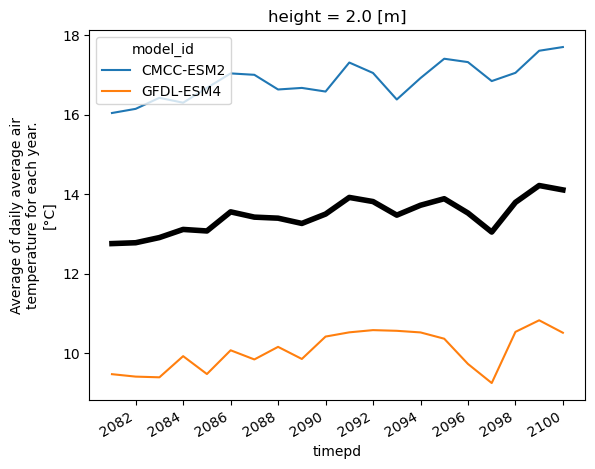

In [13]:
# Plot future time period and superimpose multi-model average in bold black line
full_tg.plot(hue="model_id")
full_tg.mean(dim="model_id").plot(color="black", linewidth=4)

## Plot a time series of the anomaly of temperature
Anomaly of temperature for SSP585 of the period 2080-2100 compared to 1971-2000.

The multi-model average is shown in bold black line.

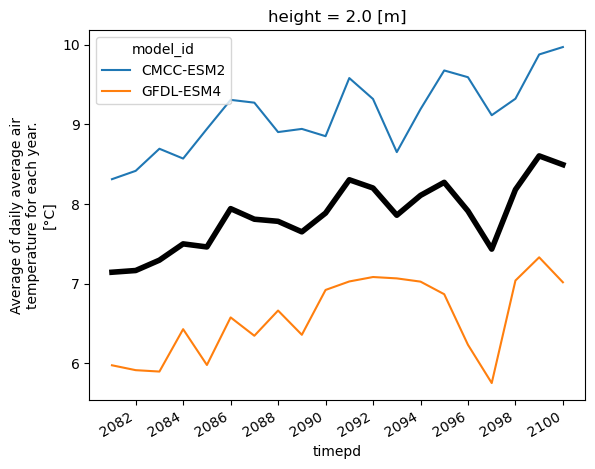

In [14]:
# Plot temperature anomaly compared to historical period and superimpose multi-model
# average in bold black line
full_tg_anomaly.plot(hue="model_id")
full_tg_anomaly.mean(dim="model_id").plot(color="black", linewidth=4)